
#### Teoría de Circuitos II

#  Tarea Semanal 14
#### Autor: Federico Rodriguez Vizzon
<img src="./assets/ned.jpeg" align="left" width="150" /> 


## Sintesis doblemente cargada.

Diseñar un cuadripolo para que se comporte como un filtro pasabajos Bessel de orden 3.

Debe ser no disipativo, y estar normalizado en frecuencia e impedancia.

Se debe respetar la siguiente topologia:

<img src="./assets/enunciado_sch.png" align="center" width="300" /> 

### Transferencia de un filtro Bessel (n = 3)

$H_b(s) = \frac{15}{s^3 + 6s^2 + 15s + 15}$

### Calculo de $S_{21}$ 

$S_{21} = \frac{V_2}{\frac{V_g}{2}} \sqrt{\frac{R_{o1}}{R_o2}} $ 

Como $R_{o1} = R_{o2} = 1 \land \frac{v_g}{2} = V_1$

$S_{21} = \frac{V_2}{\frac{V_g}{2}} = H_b(s) = \frac{15}{s^3 + 6s^2 + 15s + 15}$

### Calculo de $S_{11}$

Para las redes NO disipativas se cumple que $\mid S_{11} \mid^2 + \mid S_{21} \mid^2 = 1 $

$\mid S_{21} \mid^2 = S_{21}(s)S_{21}(-s) = \frac{15}{s^3 + 6s^2 + 15s + 15}\times \frac{15}{-s^3 + 6s^2 - 15s + 15} = \frac{225}{-s^6 + 6s^4 - 45s^2 + 225}$

$\mid S_{11} \mid^2 + \mid S_{21} \mid^2 = 1 \implies \mid S_{11} \mid^2 = 1 - \mid S_{21} \mid^2 = 1 - \frac{225}{-s^6 + 6s^4 - 45s^2 + 225} = \frac{-s^6 + 6s^4 - 45s^2}{-s^6 + 6s^4 - 45s^2 + 225}$ 

$\mid S_{11} \mid^2 = \frac{-s^6 + 6s^4 - 45s^2}{-s^6 + 6s^4 - 45s^2 + 225}$ 

Conocido el polinomio $\mid S_{11} \mid^2 $ procedemos a calcular las raices del mismo y nos quedaremos con las que estan en el semiplano izquierdo para conformar el polinimio $s_{11}$. Por la complejidad matematica de la tarea lo hacemos utilizando python.

### $Z$ en funcion de $S_{11}$

$S_{11} = \frac{Z - R_{o1}}{Z + R_{o1}} = \frac{Z - 1}{Z + 1}$

$Z = \frac{1 + S_{11}}{1 - S_{11}}$


In [97]:
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from scipy import signal as signal
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, Inductor

## setear en True para ver logs de dev
dev = False

num = np.array([-1, 0, 6, 0, -45, 0, 0])
den = np.array([-1, 0, 6, 0, -45, 0, 225])
roots_num = np.roots(num)
num_poly_result = np.polymul(np.array([-1, roots_num[0]]), np.array([-1, roots_num[1]]))
roots_den = np.roots(den)
sos_den = np.polymul(np.array([-1, roots_den[1]]), np.array([-1, roots_den[2]])).real
fos_den = np.polymul(-1, roots_den[0]).real

if dev == True:
    print(roots_num)
    print(roots_den)
    print(num_poly_result)
    print(num_poly_result.real)
    print(sos_den)
    print(fos_den)

    

$S_{11}=\frac{1.0 s^{3} + 4.40640532236865 s^{2} + 6.70820393249937 s}{\left(s + 2.32218535462609\right) \left(1.0 s^{2} + 3.67781464537392 s + 6.45943269348337\right)}$

$Z = \frac{1 + S_{11}}{1 - S_{11}}= \frac{0.133333333333333 s^{3} + 0.693760354824575 s^{2} + 1.44721359549996 s + 1.0}{0.106239645175424 s^{2} + 0.552786404500042 s + 1.0}$

### Sintesis de la red

Sintetizamos la red desde la entrada, lo debemos hacer cumpliendo con los ceros de transmision de $S_{21}$

Por tratarse de un pasabajos de orden 3 solo hay 3 ceros implicitos en infinito, por ello realizaremos todas las remociones en infinito.

$Z_1 = \frac{3125000000000 s}{2489991683799}$

$Z_2 = \frac{1.47073156863427 \cdot 10^{-16} s^{3} + 1.2746340261497 \cdot 10^{-15} s^{2} + 0.192189323598708 s + 1.0}{0.106239645175424 s^{2} + 0.552786404500042 s + 1.0}$

Luego de la remocion podemos observar que los coeficientes de orden 3 y 2 son numeros muy proximos a cero, pero por limitaciones tecnicas no lo son, por ello los redondeamos a cero para que la remocion sea total y poder avanzar.

$Z_2 = \frac{1.0 \cdot \left(0.19218932359871 s + 1.0\right)}{0.10623964517542 s^{2} + 0.55278640450004 s + 1.0}$

$Y_2 = \frac{1.0 \cdot \left(0.10623964517542 s^{2} + 0.55278640450004 s + 1.0\right)}{0.19218932359871 s + 1.0}$

$Y_3 = \frac{10623964517542 s}{19218932359871}$

$Y_4 = \frac{1}{\frac{89102588 s}{463618823} + 1}$

$Z_5 = \frac{89102588 s}{463618823}$

$Z_6 = 1$

Luego de remover el ultimo polo en infinito el unico componente que nos queda es un resistor $R = 1\Omega$.
Esto es algo que esperamos ya que la condicion de medicion de $Z$ es con la red cargada en plano de referenccia dos con $R = R_{o2} = 1 \Omega$


### Resultado de la sintesis

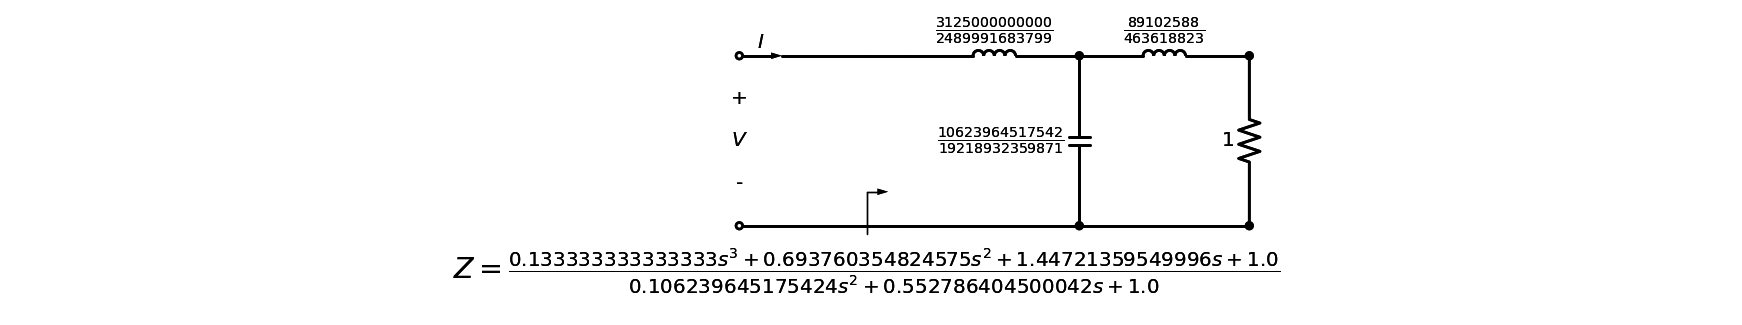

In [98]:
import sympy as sp

from pytc2.remociones import remover_polo_dc, remover_polo_infinito
from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

from pytc2.sintesis_dipolo import cauer_RC, foster
from pytc2.dibujar import dibujar_cauer_RC_RL, dibujar_foster_derivacion, dibujar_foster_serie
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

s = sp.symbols('s', complex=True)
b0, b1, b2, b3, a0, a1, a2 = sp.symbols('b0 b1 b2 b3 a0 a1 a2', real=True, positive=False)

b0 = num_poly_result[0].real
b1 = num_poly_result[1].real
b2 = num_poly_result[2].real
b3 = 0

a0 = sos_den[0]
a1 = sos_den[1]
a2 = sos_den[2]


s11 = (b0*s**3 + b1*s**2 + b2*s + b3) / ((s + fos_den[0])*(a0*s**2 + a1*s + a2))

display(Markdown(f"""$S_{{11}}={sp.latex(s11)}$"""))

num_z = sp.factor((1 + s11))
den_z =  sp.factor((1 - s11)) 
zz = sp.simplify(num_z/den_z)
display(Markdown(f"""$Z = \\frac{{1 + S_{{11}}}}{{1 - S_{{11}}}}= {sp.latex(zz)}$"""))

display(Markdown(f"""### Sintesis de la red"""))
display(Markdown(f"""Sintetizamos la red desde la entrada, lo debemos hacer cumpliendo con los ceros de transmision de $S_{{21}}$"""))
display(Markdown(f"""Por tratarse de un pasabajos de orden 3 solo hay 3 ceros implicitos en infinito, por ello realizaremos todas las remociones en infinito."""))


z2, z1 = remover_polo_infinito(zz)

L1 = z1/s

display(Markdown(f"""$Z_1 = {sp.latex(sp.simplify(z1))}$"""))
display(Markdown(f"""$Z_2 = {sp.latex(sp.simplify(z2))}$"""))

display(Markdown(f"""Luego de la remocion podemos observar que los coeficientes de orden 3 y 2 son numeros muy proximos a cero, pero por limitaciones tecnicas no lo son, por ello los redondeamos a cero para que la remocion sea total y poder avanzar."""))


for coef in sp.preorder_traversal(z2):
    if isinstance(coef, sp.Float):
        z2 = z2.subs(coef, round(coef, 14))

y2 = 1/z2
display(Markdown(f"""$Z_2 = {sp.latex(z2)}$"""))
display(Markdown(f"""$Y_2 = {sp.latex(y2)}$"""))

y4, y3 = remover_polo_infinito(y2)

C3 = y3/s

y4 = sp.nsimplify(y4,tolerance=1e-10,rational=True)


display(Markdown(f"""$Y_3 = {sp.latex(y3)}$"""))
display(Markdown(f"""$Y_4 = {sp.latex(y4)}$"""))

z6, z5 = remover_polo_infinito(1/y4)
L5 = z5/s

display(Markdown(f"""$Z_5 = {sp.latex(z5)}$"""))
display(Markdown(f"""$Z_6 = {sp.latex(z6)}$"""))
display(Markdown(f"""Luego de remover el ultimo polo en infinito el unico componente que nos queda es un resistor $R = 1\\Omega$.
Esto es algo que esperamos ya que la condicion de medicion de $Z$ es con la red cargada en plano de referenccia dos con $R = R_{{o2}} = 1 \\Omega$
"""))

display(Markdown(f"""### Resultado de la sintesis"""))
drawing = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
drawing, zz_lbl = dibujar_funcion_exc_abajo(drawing, 
                                          'Z',  
                                          zz, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5
                                     )
drawing = dibujar_elemento_serie(drawing, Inductor, L1)
drawing = dibujar_elemento_derivacion(drawing, Capacitor, C3)
drawing = dibujar_elemento_serie(drawing, Inductor, L5)
drawing = dibujar_elemento_derivacion(drawing, Resistor, z6)
display(drawing)

## Simulacion en LTSPICE

<img src="./assets/sch_normalizado.png" align="center"/> 
<img src="./assets/s21_normalizado.png" align="center"/> 
<img src="./assets/s11_normalizado.png" align="center"/> 
<img src="./assets/s21_s11_normalizado.png" align="center"/> 
<img src="./assets/s21_s11_intersect_normalizado.png" align="center"/> 

### $S_{21} vs S_{11}$

Podemos observar que en el incio de la banda de paso $S_{11}$ es muy proximo a 0, es decir la red esta adaptada. Al estar adaptada la red la potencia reflejada al generador por desaptacion es muy poca y esto contribuye a la banda de paso.

A medida que nos vamos acercando a la frecuencia de corte la adptacion se va reduciendo.
$S_{11}$ y $S_{21}$ se cruzan en el punto de 3db (fc).

Una vez que estamos en la banda de detenida $S_{11} = 1$ es decir la red esta totalmente desadaptada en la banda de detenida. Al estar totalmente desadaptada la red la potencia reflejada al generador aumenta y esto contribuye al comportamiento de filtrado en la banda de detenida, si toda la potencia incidente se refleja no hay transferencia de potencia hacia la salida y estamos cumpliendo con el comportamiento de filtrado.

## Desnormalizacion para ajustar la condiciones de trabajo

El filtro diseñado debe trabajar para 

$\omega_o = 2 \pi 10^6$

$Z_o = 50 \Omega$

De esta forma la norma de impedancia y la norma de frecuencia quedan definidas

$\Omega_z = 50$

$\Omega_{\omega} = 2 \pi 10^6$

In [99]:
omega_omega = 2*np.pi*10**6
omega_z = 50
L1b = L1*(omega_z/omega_omega)
C3b = C3/(omega_omega*omega_z)
L5b = L5*(omega_z/omega_omega)

display(Markdown(f"""$L1 = {sp.latex(L1b)} Hy$"""))
display(Markdown(f"""$C1 = {sp.latex(C3b)} F$"""))
display(Markdown(f"""$L2 = {sp.latex(L5b)} Hy$"""))



$L1 = 9.98716582866952 \cdot 10^{-6} Hy$

$C1 = 1.75957377500345 \cdot 10^{-9} F$

$L2 = 1.52939404301113 \cdot 10^{-6} Hy$

## Simulacion en LTSPICE de la red desnormalizada

<img src="./assets/sch_desnormalizado.png" align="center"/> 
<img src="./assets/s21_desnormalizado.png" align="center"/> 